In [1]:
%matplotlib inline
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd 
import json
from pprintpp import pprint as pprint
import sklearn
mpl.rcParams['font.size'] = 10
mpl.rcParams['figure.figsize'] = (10,8)

In [2]:
#READ INTO DF POPULATION DATA FROM OPEN NYC DATABASE 
with open('data/population2010_opendatanyc.json') as f:
    json_data = f.read()
    data = json.loads(json_data)['data']
    cols = json.loads(json_data)['meta']['view']['columns']
    cols = [x['fieldName'] for x in cols]

    df = pd.DataFrame(data, columns=cols)
    df = df[df.year == "2010"].reset_index().set_index("fips_county_code",drop=True)
    df.population = [int(x) for x in df.population]

In [4]:
print df.head(5)

                  index  :sid                                   :id  \
fips_county_code                                                      
005                2168  2169  A54FFCE0-A085-44B7-95F0-E3FFECD6C658   
005                2169  2170  680F0372-96D9-4931-AD05-2EF956C5AF57   
005                2170  2171  AFF6C34D-C2C2-49AE-A746-84D764C4B038   
005                2171  2172  7E21F731-DB5A-40F9-90CF-E7EF3AFE8ACC   
005                2172  2173  390392FA-3AFC-41D5-9BAB-52D24C90F858   

                  :position  :created_at :created_meta  :updated_at  \
fips_county_code                                                      
005                    2169   1362328566        704353   1362328566   
005                    2170   1362328566        704353   1362328566   
005                    2171   1362328566        704353   1362328566   
005                    2172   1362328566        704353   1362328566   
005                    2173   1362328566        704353   1362328566   

    

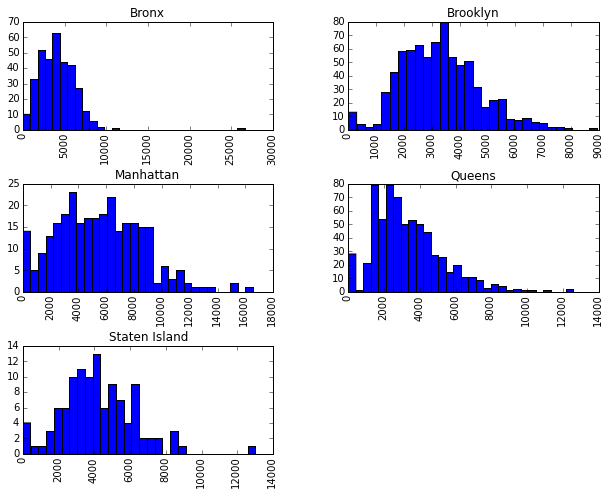

In [180]:
#PLOT DATASET BY BOROUGH
x = df.hist(column='population',by='borough',bins=30)

In [181]:
#Get zip-code level demographic information from US Census Bureau
data = pd.read_csv('data/zcta_tract_rel_10.txt',dtype=str)
data.drop_duplicates(subset= 'ZCTA5', inplace = True)
data = data[(data['STATE'] == '36') & (data['COUNTY'] == '061')] 
data.head(5)

,ZCTA5,STATE,COUNTY,TRACT,GEOID,POPPT,HUPT,AREAPT,AREALANDPT,ZPOP,...,TRAREA,TRAREALAND,ZPOPPCT,ZHUPCT,ZAREAPCT,ZAREALANDPCT,TRPOPPCT,TRHUPCT,TRAREAPCT,TRAREALANDPCT
9554,10001,36,061,005800,36061005800,471,311,31705,31705,21102,...,175468,175468,2.23,2.49,1.97,1.97,13.41,13.2,18.07,18.07
9565,10002,36,061,000201,36061000201,3058,1060,90205,90205,81410,...,179176,90205,3.76,3.07,3.96,3.96,100,100,50.34,100
9580,10003,36,061,003602,36061003602,3151,1597,89004,89004,56024,...,89004,89004,5.62,5.14,5.96,5.96,100,100,100,100
9593,10004,36,061,000100,36061000100,2,1,78638,78638,3089,...,78638,78638,.06,.05,5.42,5.42,100,100,100,100
9601,10005,36,061,000700,36061000700,6839,4619,174566,174566,7135,...,449278,253931,95.85,86.87,91.68,91.68,84.34,84.8,38.85,68.75


In [182]:
#get population for each zip code

In [183]:
#READ IN CENSUS ECONOMIC/SOCIAL DATA (5 YR ACS, 2010)
with open("../data/ss10hny.csv") as f:
    census_dat = pd.read_csv(f, sep=',')

IOError: [Errno 2] No such file or directory: '../data/ss10hny.csv'

###GET COLUMN ABBREVIATION DEFINITIONS FROM THIS URL:
http://api.census.gov/data/2013/acs5/profile/variables.json

DP03_0062M = "Median Household Income, all households"<br>
DP03_0063E = "Mean Household Income, all households"

Using my API key for the Census Bureau, I can get listings for various economic and
social variables using, e.g.,

http://api.census.gov/data/2013/acs5?get=NAME,B01001_001E&for=tract:*&in=state:36&key=641a17d8852c486df8a332c73a53b8aec9ec801a

<strong>Not sure about data above in this cell, the data from the csv file matches this table found in my insight/data directory: PUMSDataDict10.pdf </strong><br> <strong> NOTE FROM SECOND WEEK: PUMS FILES are different from profile views, do not use PUMS files as they are not aggregate at the tract/county/zip code level</strong>.

FINCP = "Family Income in 2010 dollars" !for non-2010 years use ADJINC factor to adjust to 2010 values.
HINCP = "Household Income in 2010 dollars" - difference with FINCP? 
Answer: FINCP is not always available 

###Yelp API: 
####Console: 
https://www.yelp.com/developers/api_console
####Python: 
https://www.yelp.com/developers/documentation/v2/search_api 
as well as https://github.com/Yelp/yelp-api/tree/master/v2
<br>
term = 'thai' 

sort=1 (by distance)

location = "10025" (zipcode)   OR   
ll=latitude,longitude,[accuracy,altitude,altitude_accuracy] the last three being optional
limit = 40 (max?) 

category_filter = 'restaurant,thai' (searches for categories restaurant and THAI)

radius_filter = 1000 (in meters, max = 40 kilometers)

In [220]:
#Get demographic + number of restaurant data

import pandas as pd

df = pd.read_json("data/basic_table.json").reset_index()

df['ZCTA5'].astype(str)

0     10001
1     10002
2     10003
3     10004
4     10005
5     10006
6     10007
7     10009
8     10010
9     10011
10    10012
11    10013
12    10014
13    10016
14    10017
15    10018
16    10019
17    10020
18    10021
19    10022
20    10023
21    10024
22    10025
23    10026
24    10027
25    10028
26    10029
27    10030
28    10031
29    10032
30    10033
31    10034
32    10035
33    10036
34    10037
35    10038
36    10039
37    10040
38    10044
39    10065
Name: ZCTA5, dtype: object

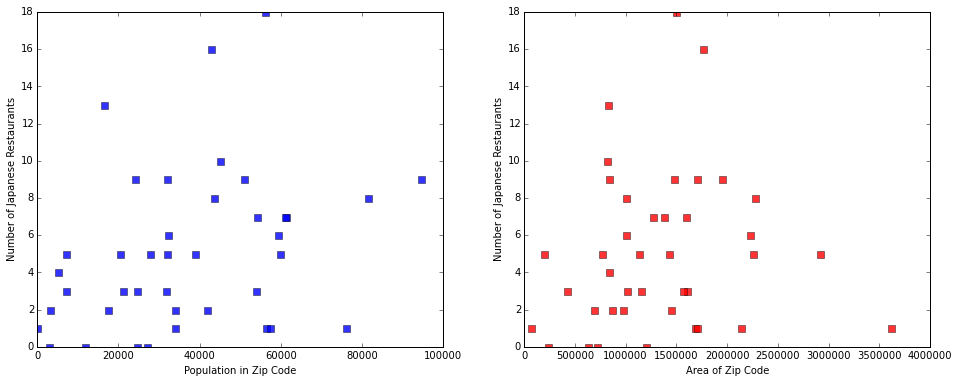

In [221]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (16,6)
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.plot(df.ZPOP,df.number_restaurants,marker='s',color='blue',linestyle="None",markersize=7,alpha=0.8)
ax1.set_xlabel("Population in Zip Code")
ax1.set_ylabel("Number of Japanese Restaurants")
ax2 = fig.add_subplot(122)
ax2.plot(df.ZAREALAND,df.number_restaurants,marker='s',color='red',linestyle="None",markersize=7,alpha=0.8)
ax2.set_xlabel("Area of Zip Code")
ax2.set_ylabel("Number of Japanese Restaurants")

In [222]:
#Now import income per capita information - from zipatlas.com

In [223]:
#Get zip-code level demographic information from US Census Bureau
income_data = pd.read_csv('data/income_zipcode.dat',dtype=str)
#df.ZCTA5
income_data['ZCTA5'] = income_data['ZCTA5'].astype(int)
income_data['ZCTA5']
df2 = df.merge(income_data,left_on="ZCTA5",right_on="ZCTA5",how="inner")
df2.income = df2.income.astype(float)
df2.income

0     23797.67
1      9064.91
2     38056.80
3     56909.50
4     48485.98
5     48702.99
6     59134.55
7     20290.91
8     38323.30
9     39990.90
10    33132.30
11    17100.00
12    42968.30
13    42526.90
14    47124.49
15    25634.21
16    35137.70
17        0.00
18    46301.84
19    52211.69
20    44983.80
21    43857.30
22    25117.68
23     9217.62
24    10381.17
25    45095.90
26     8389.43
27     7712.45
28     8581.27
29     8774.92
30    10519.46
31    10798.17
32     5685.50
33    25309.88
34    13906.28
35    14983.73
36     7118.85
37     9895.39
38    21634.63
Name: income, dtype: float64

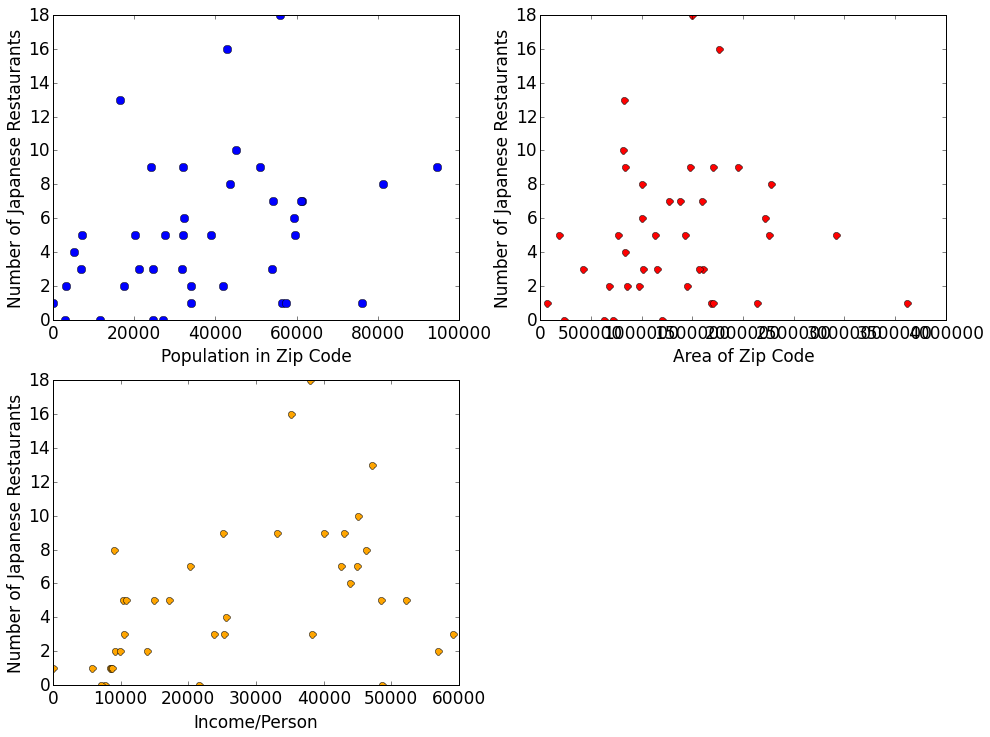

In [224]:
mpl.rcParams['figure.figsize'] = (16,12)
mpl.rcParams['font.size'] = 17
fig = plt.figure()
ax1 = fig.add_subplot(221)
ax1.plot(df.ZPOP,df.number_restaurants,marker='o',color='blue',linestyle="None",markersize=8,alpha=1.0)
ax1.set_xlabel("Population in Zip Code")
ax1.set_ylabel("Number of Japanese Restaurants")
ax2 = fig.add_subplot(222)
ax2.plot(df.ZAREALAND,df.number_restaurants,marker='o',color='red',linestyle="None",markersize=7,alpha=1.0)
ax2.set_xlabel("Area of Zip Code")
ax2.set_ylabel("Number of Japanese Restaurants")
ax3 = fig.add_subplot(223)
ax3.plot(df2.income,df2.number_restaurants,marker='o',color='orange',linestyle="None",markersize=7,alpha=1.0)
ax3.set_xlabel("Income/Person")
ax3.set_ylabel("Number of Japanese Restaurants")

In [217]:
#and now for another type of food
#Get demographic + number of restaurant data

import pandas as pd

df = pd.read_json("data/basic_table_mexican.json").reset_index()

df['ZCTA5'].astype(str)

0     10001
1     10002
2     10003
3     10004
4     10005
5     10006
6     10007
7     10009
8     10010
9     10011
10    10012
11    10013
12    10014
13    10016
14    10017
15    10018
16    10019
17    10020
18    10021
19    10022
20    10023
21    10024
22    10025
23    10026
24    10027
25    10028
26    10029
27    10030
28    10031
29    10032
30    10033
31    10034
32    10035
33    10036
34    10037
35    10038
36    10039
37    10040
38    10044
39    10065
Name: ZCTA5, dtype: object

In [218]:
#Get zip-code level demographic information from US Census Bureau
income_data = pd.read_csv('data/income_zipcode.dat',dtype=str)
#df.ZCTA5
income_data['ZCTA5'] = income_data['ZCTA5'].astype(int)
income_data['ZCTA5']
df2 = df.merge(income_data,left_on="ZCTA5",right_on="ZCTA5",how="inner")
df2.income = df2.income.astype(float)
df2.income

0     23797.67
1      9064.91
2     38056.80
3     56909.50
4     48485.98
5     48702.99
6     59134.55
7     20290.91
8     38323.30
9     39990.90
10    33132.30
11    17100.00
12    42968.30
13    42526.90
14    47124.49
15    25634.21
16    35137.70
17        0.00
18    46301.84
19    52211.69
20    44983.80
21    43857.30
22    25117.68
23     9217.62
24    10381.17
25    45095.90
26     8389.43
27     7712.45
28     8581.27
29     8774.92
30    10519.46
31    10798.17
32     5685.50
33    25309.88
34    13906.28
35    14983.73
36     7118.85
37     9895.39
38    21634.63
Name: income, dtype: float64

AttributeError: 'DataFrame' object has no attribute 'ZPOP'

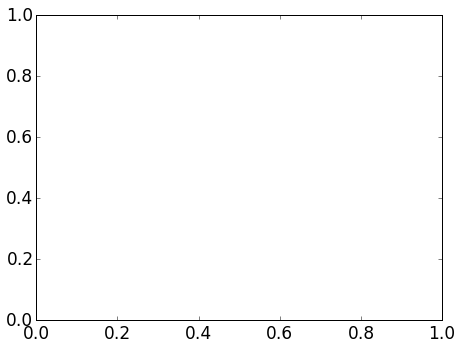

In [5]:
mpl.rcParams['figure.figsize'] = (16,12)
mpl.rcParams['font.size'] = 17
fig = plt.figure()
ax1 = fig.add_subplot(221)
ax1.plot(df.ZPOP,df.number_restaurants,marker='s',color='blue',linestyle="None",markersize=7,alpha=1)
ax1.set_xlabel("Population in Zip Code")
ax1.set_ylabel("Number of Mexican Restaurants")
ax2 = fig.add_subplot(222)
ax2.plot(df.ZAREALAND,df.number_restaurants,marker='s',color='red',linestyle="None",markersize=7,alpha=1)
ax2.set_xlabel("Area of Zip Code")
ax2.set_ylabel("Number of Mexican Restaurants")
ax3 = fig.add_subplot(223)
ax3.plot(df2.income,df2.number_restaurants,marker='s',color='orange',linestyle="None",markersize=7,alpha=1)
ax3.set_xlabel("Income/Person")
ax3.set_ylabel("Number of Mexican Restaurants")

##Second Week: Refining Project: Getting Data

### US Census Data, in particular the 5 year dataset from 2008-2013
<p>Can use 5-year American Census Survey data available at the block level, in order to get estimates of the income in each area/zip code. This API call will get the variable B01001_0100E for each census tract for state=36 (NY) and county = 05 (Bronx). Change county to get listing for other boroughs. <strong> Use the PROFILE view, not the SUMMARY FILE view, which has ?profile within the html url </strong>. 

The query below prints the variable DP03_0051E for the total number of households in each tract, for state 36 (NY) and county 05 (Bronx). 

http://api.census.gov/data/2013/acs5/profile?get=DP03_0051E&for=tract:*&in=state:36+county:05 

The definitions for the PROFILE view variables are here:http://www.census.gov/data/developers/data-sets/acs-survey-5-year-data.html#notes

Click on: <strong>"2009 - 2013 ACS Data Profile API Variables"</strong> (either HTML or JSON)

Variables of Interest are number of households broken down by household income, I show some of these variables earlier in this notebook. note that these variable names are not valid for the summary files, only for the PROFILE files. Here are some of these variables:

Income Information from Census<br>

DP03_0051E = Total households<br>
DP03_0052E = Total households < 10,000<br>
DP03_0053E = Total households 10,000 to 14,999<br>
DP03_0054E = Total households 15,000 to 24,999<br>
DP03_0055E = Total households 25,000 to 34,999<br>
DP03_0056E = Total households 35,000 to 49,999<br>
DP03_0057E = Total households 50,000 to 74,999<br>
DP03_0058E = Total households 75,000 to 99,999<br>
DP03_0059E = Total households 100,000 to 149,999<br>
DP05_0001E = Total population (cross-check with open nyc data)<br><hr>
DP05_0008E = Total population 20 to 24 years old<br>
DP05_0009E = Total population 25 to 34 years old<br>
DP05_0010E = Total population 35 to 44 years old<br>
DP05_0011E = Total population 45 to 54 years old<br>
DP05_0012E = Total population 55 to 59 years old <strong>NOTE RANGE DIFFERENCE</strong><br>
DP05_0013E = Total population 60 to 64 years old <strong>NOTE RANGE DIFFERENCE</strong><br>
DP05_0014E = Total population 65 to 74 years old<br>
DP05_0015E = Total population 75 to 84 years old<br>
DP05_0016E = Total population 85+<br><hr>

DP05_0039E = Race: Asian (what is difference with dp05_0039<strong>M</strong> ??) <br>
DP05_0033E = Race: African American<br>
DP05_0032E = Race: White<br>
DP05_0034E = Race: American Indian and Alaska Native<br>
DP05_0047E = Race: Native Hawaiian and Other Pacific Islander<br>
Note that the total population aggregate from the five categories above will not add to the total population of tract, which also includes mixed race populations. Not adding for now since there already too many variables. <br>
DP05_0065E = Hispanic and Latino of any race (perhaps worth including due to large population)<br>

To get definitions for "income" and other variables, see the pdf associated with the ACS data, named 2013_ACSSubjectDefinitions.pdf <br>
Example: To get total househoulds ( ) in all tracts in NY State:
http://api.census.gov/data/2013/acs5/profile?get=DP03_0051E&for=tract:*&in=state:36&key=641a17d8852c486df8a332c73a53b8aec9ec801a

<strong>Here are the list of county to borough mappings</strong><br>
Bronx County "Bronx" : 005<br>
Queens County "Queens": 081<br>
New York County "Manhattan": 061<br>
Kings County "Brooklyn": 047<br>
Richmond County "Staten Island": 085<br>

####In ACS dataset: Difference between _E, _M, _PE, _PM variables? Leave for later, right now use _E 


##Yelp Data

Yelp data obtained at the zip code level. For each restaurant the following keys are important. Can get more variables here:

https://www.yelp.com/developers/documentation/v2/search_api

url           string    url of restaurant<br> 
name          string    name<br>
id            string    yelp id for business<br>
is_closed     boolean   whether closed or not<br>
review_count  number    number of reviews for biz<br>
rating        [1-5]     rating for business<br>
snippet_text  string    snipped associated with biz<br>

total         number    total number for search.<br>

##Zillow Data
Subscribed to Valuations API and Mortgages API.
Valuations api = estimates of prices for individual properties. 
There is nowhere to sign up for Local Data API (http://www.zillow.com/webtools/neighborhood-data/) but the GetDemographics api seems most useful to get average house values at different zip codes. The output variables of the GetDemographics API call are here: <br>

http://www.zillow.com/howto/api/GetDemographics.htm

For example: the following is the results of the call to neighborhood data for zip code 10025. <strong> Note data comes as xml!! </strong>. The useful price data seeems to be under the tags <strong>responses > pages > page, name = "Affordability"</strong><br>

http://www.zillow.com/webservice/GetDemographics.htm?zws-id=X1-ZWz1eszas2iw3v_3if65&zip=10025

### Extracting data from Zillow API
<p>zillow api GET request returns XML code. Both lxml and ElementTree parse XML trees. Various sources indicate lxml has broader functionality, and I am using lxml as it seems easier to use XPATH to access tags.</p>

In [163]:
import requests
import lxml
def query_zillow(zipcode):
    zillow_string = "http://www.zillow.com/webservice/GetDemographics.htm?zws-id="
    with open("../oauth_keys/zillow.keys") as f:
        zillow_key = f.read().strip("\n")
        zillow_url = zillow_string + zillow_key + "&zip=" + zipcode
        r = requests.get(zillow_url)
        #create tree from "string" aka html content
        parser = etree.XMLParser()
        tree = etree.fromstring(r.content)
        if len(parser.error_log) != 0:
            return -1
        return tree

In [176]:
root = query_zillow("10023")
#Print out tags for the top three child elements
for element in root:
    print element.tag

request
message
response


####Note on XPATH and lxml library
<p>#.// is used for recursive XPATH, without .//, searches only one sublevel.</p>

###Get Zillow Home Value Index for given zipcode using lxml
<p><strong>From Zillow site: The Zillow Home Value Index is the median Zestimate valuation for a given geographic area on a given day</strong</p>

In [177]:
#Print elements with tag = "name"
find = etree.XPath(".//response/pages/page/tables/table/data/attribute")
elements = find(root)
#Find value for Zillow Home Value Index
#zillow_value_index = [x.find("values/zip/value").text for x in elements if x.find("name").text == "Zillow Home Value Index"]
zillow_value_index = [x.find("values/zip/value").text for x in elements if x.find("name").text == "Median Sale Price"]
zillow_value_index = float(zillow_value_index[0])
print zillow_value_index

883700.0


In [ ]:
#Calculate median sale price for all zipcodes


In [ ]:
#Calculate zillow home index for all zipcodes


In [ ]:
#Calculate another quantity for all zipcodes


In [ ]:
#Compare the three quantities: are they similar? 